## PART - 1. Import

**Importing Libraries**

In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Importing Dataset**

In [213]:
df = pd.read_csv('blackFriday_train.csv')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [214]:
df.drop(columns = ['User_ID', 'Product_ID'], inplace = True)

In [215]:
desc = df.describe()
desc

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [268]:
df.isnull().sum()

Gender            0
Age               0
Occupation        0
Stay              0
Marital_Status    0
cat1              0
cat2              0
cat3              0
Purchase          0
B                 0
C                 0
dtype: int64

**Observation:**
- Missing values in columns - Product_Category_1 and Product_Category_2

In [217]:
for i in df.columns:
  print (i, df[i].unique())

Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase [ 8370 15200  1422 ...   135   123   613]


**Observation:**
-  Every feature seem to be catogorical

## PART - 2. Data Preprocessing

**Imputing Missing Values**

Product_Category_2,3

In [218]:
# we will rename the Product_Category_ columns for our convinience 😉
df.rename(columns = {'Product_Category_1' : 'cat1', 'Product_Category_2' : 'cat2', 'Product_Category_3' : 'cat3'}, inplace = True)
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat1', 'cat2', 'cat3',
       'Purchase'],
      dtype='object')

In [219]:
df.cat1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [220]:
df.cat2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [221]:
df.cat3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [222]:
df['cat2'] = df['cat2'].fillna(df.cat2.mode()[0])
df['cat3'] = df['cat3'].fillna(df.cat3.mode()[0])

In [223]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
dtype: int64

All missing values successfully imputed!🎉

**Handling Categorical Features**

Gender

In [224]:
df['Gender'] = df.Gender.map({'F':0, 'M':1})

Age

In [225]:
df['Age'] = df.Age.map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7 })

**Creating Dummies**

City_Category

In [226]:
city = pd.get_dummies(data = df.City_Category, drop_first = True)

In [227]:
# Concatenate city to the main df
#df.drop(columns = 'City_Category', inplace = True)
df = pd.concat([df, city], axis = 1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,C,4+,0,8,8.0,16.0,7969,0,1


Stay_In_Current_City_Years

In [228]:
df.rename(columns = {'Stay_In_Current_City_Years' : 'Stay'}, inplace = True) 
df['Stay'] = df['Stay'].str.replace('+','')


**Checking the dtype of all over the dataset** before starting visualizing

In [229]:
df.dtypes

Gender              int64
Age                 int64
Occupation          int64
City_Category      object
Stay               object
Marital_Status      int64
cat1                int64
cat2              float64
cat3              float64
Purchase            int64
B                   uint8
C                   uint8
dtype: object

In [230]:
df['Stay'] = df['Stay'].astype(str).astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

## PART - 3. Explore, Visualize & Analyse

**Analyse Purchase by Gender**

 - 0 - Female
 - 1 - Male

Finding maximum Purchase by Gender

In [231]:
df.groupby(df['Gender']).Purchase.max()

Gender
0    23959
1    23961
Name: Purchase, dtype: int64

Finding minimum Purchase by Gender

In [232]:
df.groupby(df['Gender']).Purchase.min()

Gender
0    12
1    12
Name: Purchase, dtype: int64

Finding mean Purchase by Gender

In [233]:
df.groupby(df['Gender']).Purchase.mean()

Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64

**Visualize Purchase by Gender**

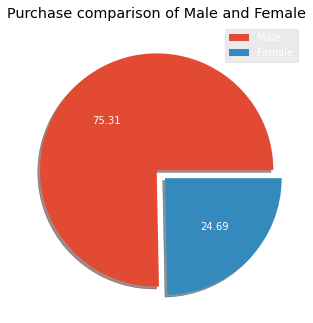

In [234]:
# Pie chart
plt.figure( figsize=(5,5))
plt.style.use('ggplot')

size = df.Gender.value_counts()
labels = ['Male', 'Female']
plt.pie(x = size, explode = [0, 0.1], labels = labels, autopct = '%.2f', shadow=True)
plt.title('Purchase comparison of Male and Female', color = 'black')
plt.legend()

**Analyse Purchase by Age**

 - (0-17) - 1
 - (18-25) - 2	
 - (26-35) - 3
 - (36-45) - 4
 - (46-50) - 5
 - (51-55) - 6
 - 55+ - 7

In [235]:
df.groupby(df['Age']).Purchase.mean()

Age
1    8933.464640
2    9169.663606
3    9252.690633
4    9331.350695
5    9208.625697
6    9534.808031
7    9336.280459
Name: Purchase, dtype: float64

**Visualize Purchase by Age**

Text(0.5, 1.0, 'Age distribution on Purchase')

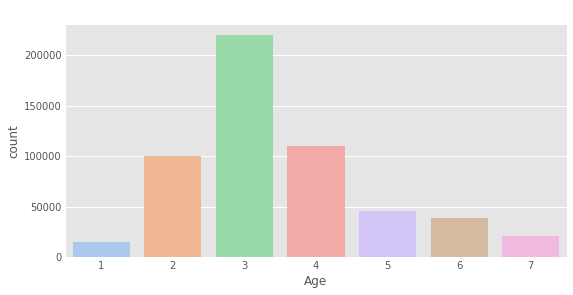

In [236]:
plt.style.use('ggplot')
sns.countplot(data = df, x = df['Age'], palette = 'pastel')
plt.title('Age distribution on Purchase')

**Analyze Purchase by City**

 - A - 0 0 
 - B - 0 1
 - C - 1 0

In [237]:
df.groupby(by = ['City_Category']).Purchase.mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

**Visualize Purchase by City**

Text(0.5, 1.0, 'Customer Purchase distribution accross Cities')

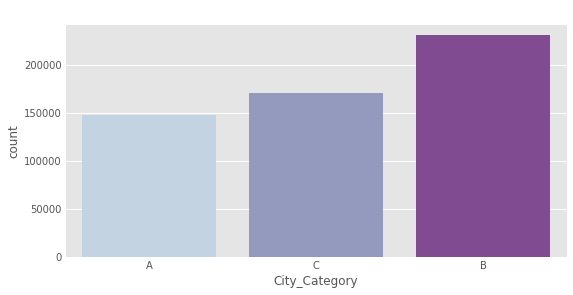

In [238]:
plt.style.use('ggplot')
sns.countplot(data = df, x = df['City_Category'], palette = 'BuPu')
plt.title('Customer Purchase distribution accross Cities')

**Visualize Purchase by Occupation**

Text(0.5, 1.0, 'Customer Occupation distribution on Purchase')

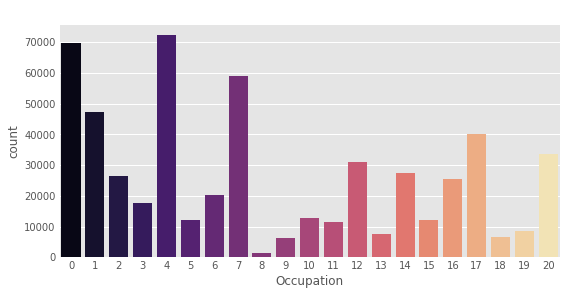

In [239]:
plt.style.use('ggplot')
sns.countplot(data = df, x = df['Occupation'], palette = 'magma')
plt.title('Customer Occupation distribution on Purchase')

**Visualize Purchase on Years of Stay**

Text(0.5, 1.0, 'Customer Years of Stay distribution based on Purchase ')

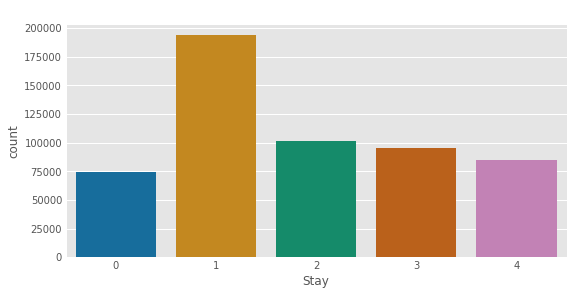

In [240]:
plt.style.use('ggplot')
sns.countplot(data = df, x = df['Stay'], palette = 'colorblind')
plt.title('Customer Years of Stay distribution based on Purchase ')

**Visualize the sales of different product category**

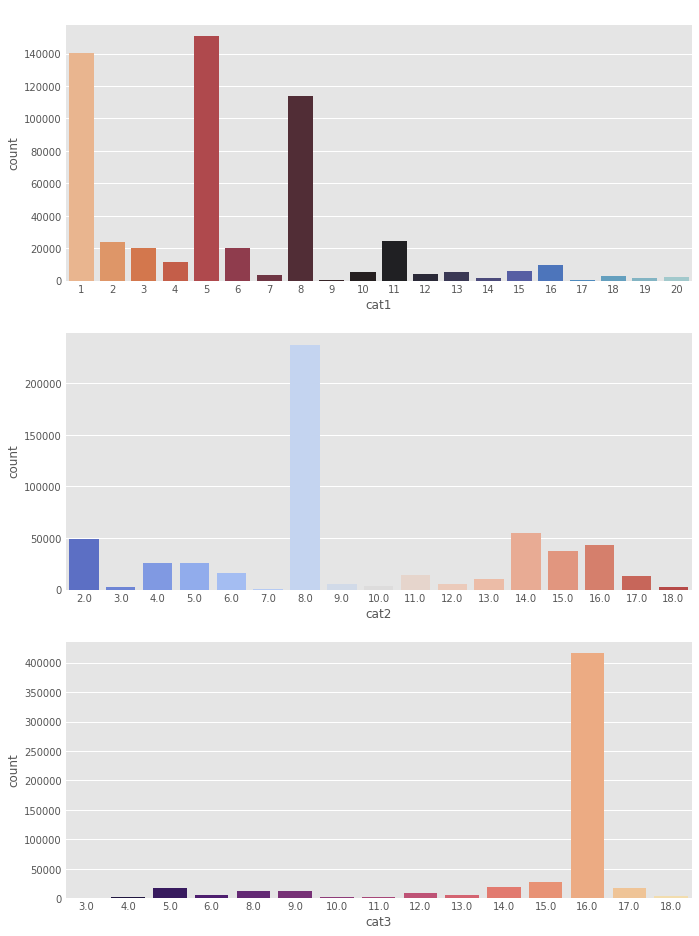

In [241]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 15)

plt.subplot(3,1,1)
sns.countplot(data = df, x = df['cat1'], palette = 'icefire_r')
plt.title('Purchase of Product Category_1')

plt.subplot(3,1,2)
sns.countplot(data = df, x = df['cat2'], palette = 'coolwarm')
plt.title('Purchase Purchase of Product Category_2')

plt.subplot(3,1,3)
sns.countplot(data = df, x = df['cat3'], palette = 'magma')
plt.title('Purchase Purchase of Product Category_3')

plt.show()

**Visualizing Target - Purchase**

Text(0.5, 1.0, 'Purchase distribution')

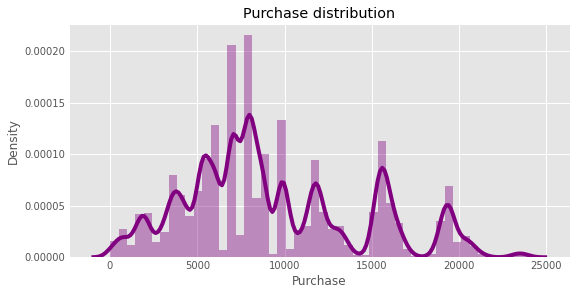

In [242]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

sns.distplot(df['Purchase'], color = 'purple')
plt.title('Purchase distribution', color = 'black')

## PART - 4. Building Model

In [243]:
# viewing df
df.head()

,Gender,Age,Occupation,City_Category,Stay,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,C,4,0,8,8.0,16.0,7969,0,1


In [244]:
#drop City_Category
df.drop(columns = 'City_Category', inplace = True)

**Train - Test - Split**

In [245]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Purchase')
y = df.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

**Linear Regression**

In [246]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
y_pred = lr_model.predict(X_test)

In [248]:
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

**Ridge Regressor**

In [249]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [250]:
ridge_y_pred = ridge_model.predict(X_test)

In [251]:
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

**Lasso Regressor**

In [252]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [253]:
lasso_y_pred = lasso_model.predict(X_test)

In [254]:
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

**Elastic Regressor**

In [255]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [256]:
elastic_y_pred = elastic_model.predict(X_test)

In [257]:
elastic_r2 = r2_score(y_test, elastic_y_pred)
elastic_mae = mean_absolute_error(y_test, elastic_y_pred)
elastic_mse = mean_squared_error(y_test, elastic_y_pred)
elastic_rmse = np.sqrt(elastic_mse)

**DecissionTreeRegressor**

In [258]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [259]:
dt_y_pred = dt_model.predict(X_test)

In [260]:
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

**Random Forest Resgressor**

In [261]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [262]:
rf_y_pred = rf_model.predict(X_test)

In [263]:
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

**Gradient Booster Regressor**

In [264]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [265]:
gb_y_pred = gb_model.predict(X_test)

In [266]:
gb_r2 = r2_score(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

## PART - 5. Evaluation of Models

In [267]:
r2 = [lr_r2, ridge_r2, lasso_r2, elastic_r2, dt_r2, rf_r2, gb_r2] 
mae = [lr_mae, ridge_mae, lasso_mae, elastic_mae, dt_mae, rf_mae, gb_mae]
mse = [lr_mse, ridge_mse, lasso_mse, elastic_mse, dt_mse, rf_mse, gb_mse]
rmse = [lr_rmse, ridge_rmse, lasso_rmse, elastic_rmse, dt_rmse, rf_rmse, gb_rmse]
metrics_df = pd.DataFrame(data = [r2, mae, mse, rmse] , index = ['R2_Score', 'MAE', 'MSE', 'RMSE'], columns = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'DecissionTreeReg', 'RandomForestReg', 'GBRegressor',])
metrics_df.round(2)

,Linear,Ridge,Lasso,ElasticNet,DecissionTreeReg,RandomForestReg,GBRegressor
R2_Score,0.13,0.13,0.13,0.13,0.56,0.63,0.64
MAE,3575.52,3575.52,3575.42,3584.19,2346.16,2222.02,2269.28
MSE,21849890.00,21849890.09,21850008.02,21920190.42,10942742.85,9311761.87,8981901.57
RMSE,4674.39,4674.39,4674.40,4681.90,3307.98,3051.52,2996.98
